<a href="https://colab.research.google.com/github/STASYA00/AECinCode_tutorials/blob/main/notebooks/example_data_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

In [2]:
a = [1,2,3,4]

In [4]:
import cv2

im = cv2.imread("stasja.png")

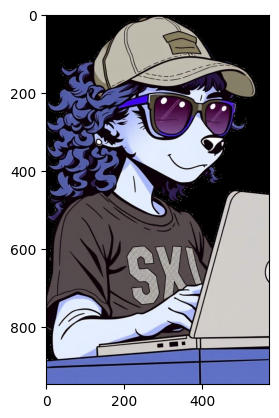

In [5]:
import matplotlib.pyplot as plt
plt.imshow(im)

In [7]:
im.shape

(948, 573, 3)

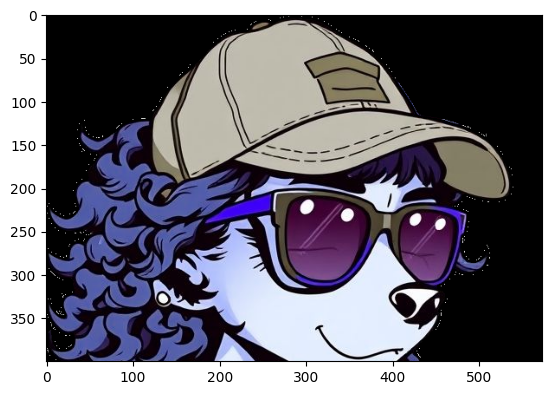

In [6]:
plt.imshow(im[0:400])

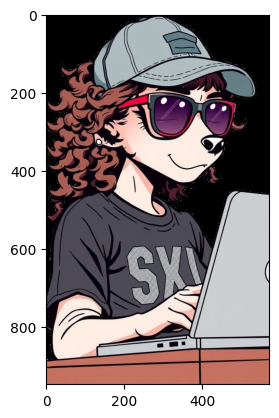

In [12]:
plt.imshow(im[:, :, ::-1])

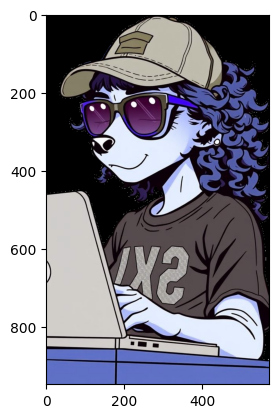

In [13]:
plt.imshow(im[:, ::-1])

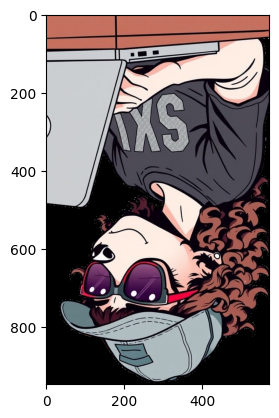

In [15]:
plt.imshow(im[::-1, ::-1, ::-1])

In [16]:
# prompt: choose all elements in numpy array (image) equal to 0,0,0

black_pixels = np.where(np.all(im == [0, 0, 0], axis=-1))
black_pixels


(array([  0,   0,   0, ..., 888, 888, 888]),
 array([ 0,  1,  2, ..., 11, 12, 13]))

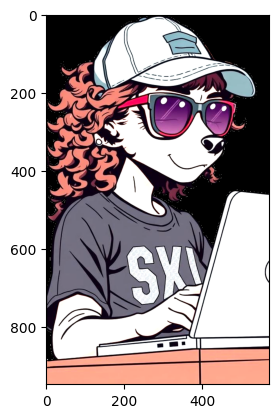

In [17]:


# Assuming 'im' is your image loaded using cv2.imread()
# Example: Increase contrast by a factor of 1.5
contrast_factor = 1.5
im_adjusted = np.clip(im * contrast_factor, 0, 255).astype(np.uint8)


plt.imshow(im_adjusted[:, :, ::-1]) # Show the adjusted image


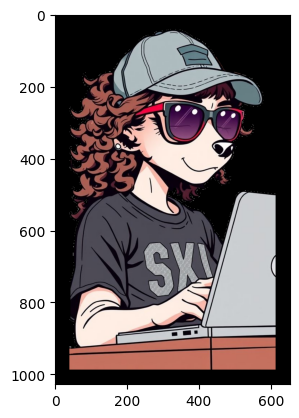

In [18]:

# Get image dimensions
height, width, channels = im.shape

# Create a new image with a border
bordered_image = np.zeros((height + 80, width + 80, channels), dtype=np.uint8)  # 40px border on each side
bordered_image[40:height + 40, 40:width + 40] = im # Place the original image in the center of the new image


plt.imshow(bordered_image[:, :, ::-1]) # Show the bordered image


In [ ]:
im / 255.

In [ ]:
!ls

Airbnb_Open_Data.csv  sample_data


In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('Airbnb_Open_Data.csv')

<ipython-input-3-e60a80b46a6c>:1: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Airbnb_Open_Data.csv')


In [ ]:
df.head()

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,8.001449e+10,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,5.233517e+10,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,7.882924e+10,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN
3,1002755,NaN,8.509833e+10,unconfirmed,Garry,Brooklyn,Clinton Hill,40.68514,-73.95976,United States,...,$74,30.0,270.0,7/5/2019,4.64,4.0,1.0,322.0,NaN,NaN
4,1003689,Entire Apt: Spacious Studio/Loft by central park,9.203760e+10,verified,Lyndon,Manhattan,East Harlem,40.79851,-73.94399,United States,...,$41,10.0,9.0,11/19/2018,0.10,3.0,1.0,289.0,"Please no smoking in the house, porch or on th...",NaN


In [ ]:
df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

In [ ]:
df.columns = [x.lower().replace(" ", "_") for x in df.columns]

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'license'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94136 entries, 0 to 94135
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              94136 non-null  int64  
 1   name                            93901 non-null  object 
 2   host_id                         94135 non-null  float64
 3   host_identity_verified          93862 non-null  object 
 4   host_name                       93746 non-null  object 
 5   neighbourhood_group             94106 non-null  object 
 6   neighbourhood                   94119 non-null  object 
 7   lat                             94127 non-null  float64
 8   long                            94127 non-null  float64
 9   country                         93771 non-null  object 
 10  country_code                    94035 non-null  object 
 11  instant_bookable                94035 non-null  object 
 12  cancellation_policy             

In [ ]:
df.shape[0]

94136

In [ ]:
df.isna()

,id,name,host_id,host_identity_verified,host_name,neighbourhood_group,neighbourhood,lat,long,country,...,service_fee,minimum_nights,number_of_reviews,last_review,reviews_per_month,review_rate_number,calculated_host_listings_count,availability_365,house_rules,license
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,True,True,False,False,False,False,True
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94131,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
94132,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
94133,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
94134,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


In [ ]:
df.isna().sum() / df.shape[0]

,0
id,0.000000
name,0.002496
host_id,0.000011
host_identity_verified,0.002911
host_name,0.004143
neighbourhood_group,0.000319
neighbourhood,0.000181
lat,0.000096
long,0.000096
country,0.003877


In [ ]:
def drop(df):
  return df - column

In [ ]:
df.drop(columns=["license"], inplace=True)

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules'],
      dtype='object')

In [ ]:
df = df.loc[ df["lat"].isna()==False]

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df["reviews_missing"] = df["last_review"].isna()

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_identity_verified', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'lat', 'long', 'country',
       'country_code', 'instant_bookable', 'cancellation_policy', 'room_type',
       'construction_year', 'price', 'service_fee', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'review_rate_number', 'calculated_host_listings_count',
       'availability_365', 'house_rules', 'reviews_missing'],
      dtype='object')

In [ ]:
df["construction_year"].mean()

np.float64(2012.4852543491686)

In [ ]:
df["construction_year"].fillna(int(df["construction_year"].mean()), inplace=True)

In [ ]:
df["price"]

,price
0,$966
1,$142
2,$620
3,$368
4,$204
...,...
94130,$740
94131,$124
94132,$527
94133,$374


In [ ]:
df["price"].loc[~df["price"].apply(lambda x: isinstance(x, str))].isna().sum()

np.int64(218)

In [ ]:
df["price"] = df["price"].apply(lambda x: int(x[1:].replace(",", "")) if isinstance(x, str) else 0)

In [ ]:
missing_date = "01/01/2000"

In [ ]:
df["last_review"].fillna(missing_date, inplace=True)

<ipython-input-45-60623817af6e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["last_review"].fillna(missing_date, inplace=True)


In [ ]:
df["last_review"] = pd.to_datetime(df["last_review"])

In [ ]:
df["last_review"].apply(lambda s: s.weekday())

,last_review
0,1
1,5
2,5
3,4
4,0
...,...
94130,2
94131,2
94132,6
94133,5


In [ ]:
df["neighbourhood_group"].value_counts()

,count
neighbourhood_group,
Manhattan,40345
Brooklyn,38314
Queens,12108
Bronx,2469
Staten Island,860
brookln,1
manhatan,1


In [ ]:
df["neighbourhood_group"].replace(0, "Brooklyn", inplace=True)

<ipython-input-62-253b98209ebb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["neighbourhood_group"].replace(0, "Brooklyn", inplace=True)


In [ ]:
pd.get_dummies(df, columns=['neighbourhood_group'], prefix=['neighbourhood'])

,id,name,host_id,host_identity_verified,host_name,neighbourhood,lat,long,country,country_code,...,availability_365,house_rules,reviews_missing,neighbourhood_Bronx,neighbourhood_Brooklyn,neighbourhood_Manhattan,neighbourhood_Queens,neighbourhood_Staten Island,neighbourhood_brookln,neighbourhood_manhatan
0,1001254,Clean & quiet apt home by the park,8.001449e+10,unconfirmed,Madaline,Kensington,40.64749,-73.97237,United States,US,...,286.0,Clean up and treat the home the way you'd like...,False,False,True,False,False,False,False,False
1,1002102,Skylit Midtown Castle,5.233517e+10,verified,Jenna,Midtown,40.75362,-73.98377,United States,US,...,228.0,Pet friendly but please confirm with me if the...,False,False,False,True,False,False,False,False
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,7.882924e+10,NaN,Elise,Harlem,40.80902,-73.94190,United States,US,...,352.0,"I encourage you to use my kitchen, cooking and...",True,False,False,True,False,False,False,False
3,1002755,NaN,8.509833e+10,unconfirmed,Garry,Clinton Hill,40.68514,-73.95976,United States,US,...,322.0,NaN,False,False,True,False,False,False,False,False
4,1003689,Entire Apt: Spacious Studio/Loft by central park,9.203760e+10,verified,Lyndon,East Harlem,40.79851,-73.94399,United States,US,...,289.0,"Please no smoking in the house, porch or on th...",False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94130,52989335,Spectacular 1-Bedroom modern apartment in Flat...,1.346179e+10,unconfirmed,Santiago,Midtown,40.74383,-73.98387,United States,US,...,0.0,Please leave shoes at the front door. Guests s...,False,False,False,True,False,False,False,False
94131,52989887,NYC experience,3.117087e+09,verified,Carlos,Bushwick,40.69355,-73.91829,United States,US,...,365.0,#NAME?,False,False,True,False,False,False,False,False
94132,52990440,3 QUEEN size lofts in Williamsburg/grrenpoint!!!,4.448837e+10,verified,Jimmy,Greenpoint,40.72552,-73.95647,United States,US,...,14.0,Please be respectful of other guests. Keep th...,False,False,True,False,False,False,False,False
94133,52990992,Artist Warehouse Loft,3.654297e+10,verified,Taras,Navy Yard,40.69792,-73.96406,United States,US,...,0.0,NaN,False,False,True,False,False,False,False,False


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()
encoder.fit(df['neighbourhood_group'])

LabelEncoder()

In [ ]:
encoder.classes_

array(['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island',
       'manhatan', nan], dtype=object)

In [ ]:
encoder.transform(df['neighbourhood_group'])

array([1, 2, 2, ..., 1, 1, 2])